In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast
import numpy as np
from matplotlib.patches import Patch
import seaborn as snn
%pip install squarify
import squarify

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Import csv files

In [2]:
movies_df = pd.read_csv('movie_info_final.csv')

In [3]:
movies_df.head()

,movieId,imdbId,title,year,certificate,length (min),stars,genres,directors,rating,rating_no (K)
0,1,114709,Toy Story (1995),1995,G,81,"['Tom Hanks ', ' Tim Allen ', ' Don Rickles']",Adventure|Animation|Children|Comedy|Fantasy,['John Lasseter'],8.3,1100.0
1,2,113497,Jumanji (1995),1995,PG,104,"['Robin Williams ', ' Kirsten Dunst ', ' Bonni...",Adventure|Children|Fantasy,['Joe Johnston'],7.1,372.0
2,3,113228,Grumpier Old Men (1995),1995,PG13,101,"['Walter Matthau ', ' Jack Lemmon ', ' Ann-Mar...",Comedy|Romance,['Howard Deutch'],6.6,30.0
3,4,114885,Waiting to Exhale (1995),1995,R,124,"['Whitney Houston ', ' Angela Bassett ', ' Lor...",Comedy|Drama|Romance,['Forest Whitaker'],6.0,12.0
4,5,113041,Father of the Bride Part II (1995),1995,PG,106,"['Steve Martin ', ' Diane Keaton ', ' Martin S...",Comedy,['Charles Shyer'],6.1,41.0


## 1. Genres

### 1.1 Count Genres

In [4]:
genre_counts = Counter([genre for sublist in movies_df['genres'].str.split('|') for genre in sublist])

genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

genre_counts_df

,Genre,Count
6,Drama,4326
3,Comedy,3663
9,Thriller,1877
7,Action,1811
5,Romance,1584
0,Adventure,1250
8,Crime,1189
10,Horror,971
12,Sci-Fi,966
4,Fantasy,770


<ipython-input-5-e6a62cda5ff5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=genre_counts_df, x='Count', y='Genre', palette='plasma')


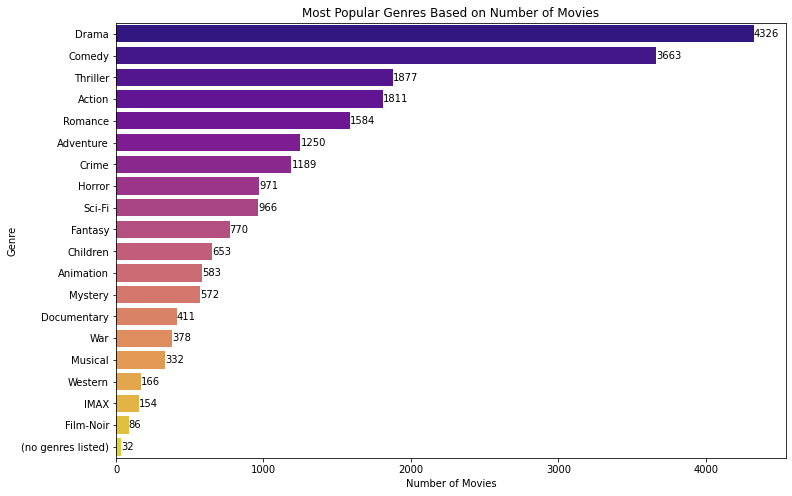

In [5]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=genre_counts_df, x='Count', y='Genre', palette='plasma')
plt.title('Most Popular Genres Based on Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Iterate through the bars and add text annotations
for p in barplot.patches:
    width = p.get_width()  
    plt.text(width + 0.3,  
             p.get_y() + p.get_height() / 2,  
             '{:1.0f}'.format(width),  
             ha='left',  
             va='center')  

plt.show()

###  1.2 Genres v.s Ratings

In [6]:
# Split the 'genres' column into individual genres
df = movies_df
df['genres'] = df['genres'].str.split('|')

# Explode the genres column so each genre gets their own row
df_exploded = movies_df.explode('genres')

# Group by genres and calculate average rating
genre_rating = df_exploded.groupby('genres').agg(
    ave_rating_genres=('rating', 'mean'),
    avg_rating_no_genres = ('rating_no (K)', 'mean')
)

# Round the ave_rating_genres with one decimal point
genre_rating['ave_rating_genres'] = genre_rating['ave_rating_genres'].round(2)
genre_rating['avg_rating_no_genres'] = genre_rating['avg_rating_no_genres'].round(3)

genre_rating = genre_rating.reset_index()
genre_rating

,genres,ave_rating_genres,avg_rating_no_genres
0,(no genres listed),6.87,40.040
1,Action,6.39,154.460
2,Adventure,6.57,160.704
3,Animation,7.00,94.486
4,Children,6.39,92.254
5,Comedy,6.39,66.225
6,Crime,6.76,125.903
7,Documentary,7.49,13.221
8,Drama,6.93,84.037
9,Fantasy,6.53,127.581


In [7]:
# Sort by average rating points
genre_rating1= genre_rating.sort_values(by='ave_rating_genres', ascending=False)
genre_rating1

,genres,ave_rating_genres,avg_rating_no_genres
7,Documentary,7.49,13.221
10,Film-Noir,7.42,79.040
18,War,7.14,112.938
3,Animation,7.00,94.486
8,Drama,6.93,84.037
19,Western,6.90,81.992
0,(no genres listed),6.87,40.040
13,Musical,6.85,61.774
14,Mystery,6.81,123.659
12,IMAX,6.79,440.898


In [8]:
# Sort by average rating numbers
genre_rating2= genre_rating.sort_values(by='avg_rating_no_genres', ascending=False)
genre_rating2

,genres,ave_rating_genres,avg_rating_no_genres
12,IMAX,6.79,440.898
16,Sci-Fi,6.36,162.734
2,Adventure,6.57,160.704
1,Action,6.39,154.460
9,Fantasy,6.53,127.581
17,Thriller,6.50,127.531
6,Crime,6.76,125.903
14,Mystery,6.81,123.659
18,War,7.14,112.938
3,Animation,7.00,94.486


<ipython-input-9-92a928f3a9c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(data=genre_rating1, x='ave_rating_genres', y='genres', palette='plasma')


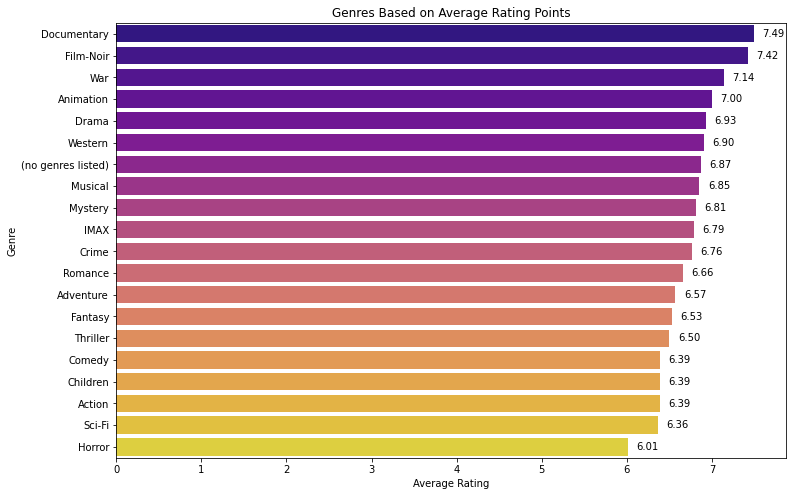

In [9]:
plt.figure(figsize=(12, 8))
barplot1 = sns.barplot(data=genre_rating1, x='ave_rating_genres', y='genres', palette='plasma')
plt.title('Genres Based on Average Rating Points')
plt.xlabel('Average Rating')
plt.ylabel('Genre')

# Iterate through the bars and add text annotations
for p in barplot1.patches:
    width = p.get_width()  
    plt.text(width + 0.1,  
             p.get_y() + p.get_height() / 2,  
             '{:0.2f}'.format(width),  
             ha='left',  
             va='center')  

plt.show()

<ipython-input-10-341cfe9797e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(data=genre_rating2, x='avg_rating_no_genres', y='genres', palette='plasma')


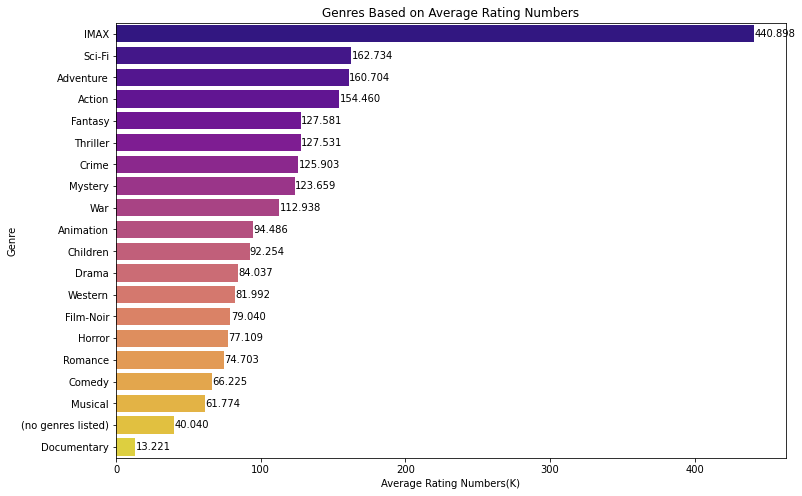

In [10]:
plt.figure(figsize=(12, 8))
barplot2 = sns.barplot(data=genre_rating2, x='avg_rating_no_genres', y='genres', palette='plasma')
plt.title('Genres Based on Average Rating Numbers')
plt.xlabel('Average Rating Numbers(K)')
plt.ylabel('Genre')

# Iterate through the bars and add text annotations
for p in barplot2.patches:
    width = p.get_width()  
    plt.text(width + 0.2,  
             p.get_y() + p.get_height() / 2,  
             '{:0.3f}'.format(width),  
             ha='left',  
             va='center')  

plt.show()

In [11]:
# merge two tables
genre_df_combined = genre_counts_df.merge(genre_rating, left_on='Genre', right_on='genres', how='outer').drop('genres', axis=1)
genre_df_combined

,Genre,Count,ave_rating_genres,avg_rating_no_genres
0,Drama,4326,6.93,84.037
1,Comedy,3663,6.39,66.225
2,Thriller,1877,6.50,127.531
3,Action,1811,6.39,154.460
4,Romance,1584,6.66,74.703
5,Adventure,1250,6.57,160.704
6,Crime,1189,6.76,125.903
7,Horror,971,6.01,77.109
8,Sci-Fi,966,6.36,162.734
9,Fantasy,770,6.53,127.581


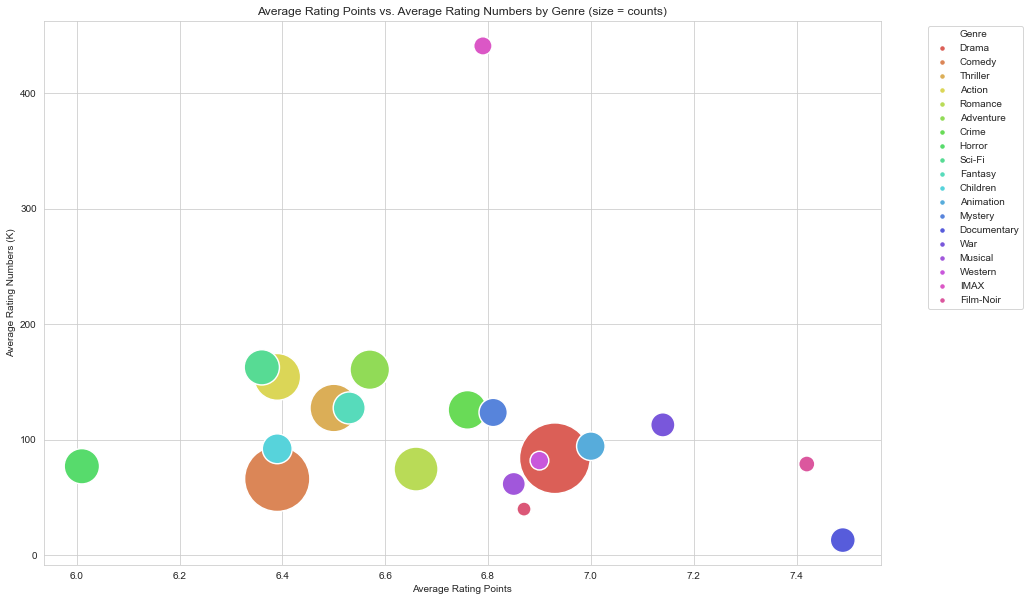

In [66]:
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(data=genre_df_combined, x='ave_rating_genres', y='avg_rating_no_genres',
                          size='Count', hue='Genre', sizes=(200, 5000), legend='brief', palette='hls')



# Manually adjust the legend to only show genres
# Extract handles and labels for the current legend
handles, labels = scatter.get_legend_handles_labels()

# Filter out size-related handles and labels
filtered_handles = [h for i, h in enumerate(handles) if i < len(genre_df_combined['Genre'].unique())]
filtered_labels = labels[:len(genre_df_combined['Genre'].unique())]

# Create a new legend with the filtered handles and labels
plt.legend(filtered_handles, filtered_labels, title='', bbox_to_anchor=(1.05, 1), loc=2)

# Adding titles and labels
plt.title('Average Rating Points vs. Average Rating Numbers by Genre (size = counts)')
plt.xlabel('Average Rating Points')
plt.ylabel('Average Rating Numbers (K)')
plt.grid(True)

###  1.3 Top 5 Movies by Rating in Each Genre

In [13]:
# Group by genre, then sort and select top 5 movies for each genre
top_movies_by_genre = df_exploded.groupby('genres').apply(lambda x: x.sort_values('rating', ascending=False).head(5))
top_movies_by_genre.reset_index(drop=True, inplace=True)

In [14]:
top_movies_by_genre

,movieId,imdbId,title,year,certificate,length (min),stars,genres,directors,rating,rating_no (K)
0,171495,81846,Cosmos,1980,PG,780,"['Carl Sagan ', ' Jaromír Hanzlík ', ' Jonatha...",(no genres listed),"[' Carl Sagan ', 'Creators ', ' Steven Soter '...",9.3,43.0
1,172591,150742,The Godfather Trilogy: 1972-1990 (1992),1992,R,583,"['Marlon Brando ', ' Al Pacino ', ' Robert Duv...",(no genres listed),['Francis Ford Coppola'],9.3,16.0
2,171749,877057,Death Note: Desu nôto (2006–2007),2006–2007,TV-14,851,"['Mamoru Miyano ', ' Brad Swaile ', ' Vincent ...",(no genres listed),"['Stars ', ' Vincent Tong ', ' Brad Swaile ', ...",8.9,370.0
3,147250,229922,The Adventures of Sherlock Holmes and Doctor W...,1980,unrated,64,"['Vasiliy Livanov ', ' Vitali Solomin ', ' Rin...",(no genres listed),['Igor Maslennikov'],8.4,2.5
4,173535,459945,The Adventures of Sherlock Holmes and Doctor W...,1980,unrated,65,"['Vasiliy Livanov ', ' Vitali Solomin ', ' Rin...",(no genres listed),['Igor Maslennikov'],8.3,2.2
...,...,...,...,...,...,...,...,...,...,...,...
95,1201,60196,"Good, the Bad and the Ugly, The (Buono, il bru...",1966,Passed,178,"['Clint Eastwood ', ' Eli Wallach ', ' Lee Van...",Western,['Sergio Leone'],8.8,803.0
96,26649,96639,Lonesome Dove (1989),1989,TV-14,384,"['Robert Duvall ', ' Tommy Lee Jones ', ' Dann...",Western,"['Stars ', ' Danny Glover ', ' Robert Duvall '...",8.7,25.0
97,99114,1853728,Django Unchained (2012),2012,R,165,"['Jamie Foxx ', ' Christoph Waltz ', ' Leonard...",Western,['Quentin Tarantino'],8.5,1700.0
98,1209,64116,Once Upon a Time in the West (C'era una volta ...,1968,PG13,166,"['Henry Fonda ', ' Charles Bronson ', ' Claudi...",Western,['Sergio Leone'],8.5,346.0


In [15]:
# Show the result
top_movies_per_genre = top_movies_by_genre[['title', 'genres', 'rating']]
top_movies_per_genre

,title,genres,rating
0,Cosmos,(no genres listed),9.3
1,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),9.3
2,Death Note: Desu nôto (2006–2007),(no genres listed),8.9
3,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),8.4
4,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),8.3
...,...,...,...
95,"Good, the Bad and the Ugly, The (Buono, il bru...",Western,8.8
96,Lonesome Dove (1989),Western,8.7
97,Django Unchained (2012),Western,8.5
98,Once Upon a Time in the West (C'era una volta ...,Western,8.5


<ipython-input-16-9a40135e38ca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=genre_data, ax=ax, palette="viridis")
<ipython-input-16-9a40135e38ca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=genre_data, ax=ax, palette="viridis")
<ipython-input-16-9a40135e38ca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=genre_data, ax=ax, palette="viridis")
<ipython-input-16-9a40135e38ca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is depre

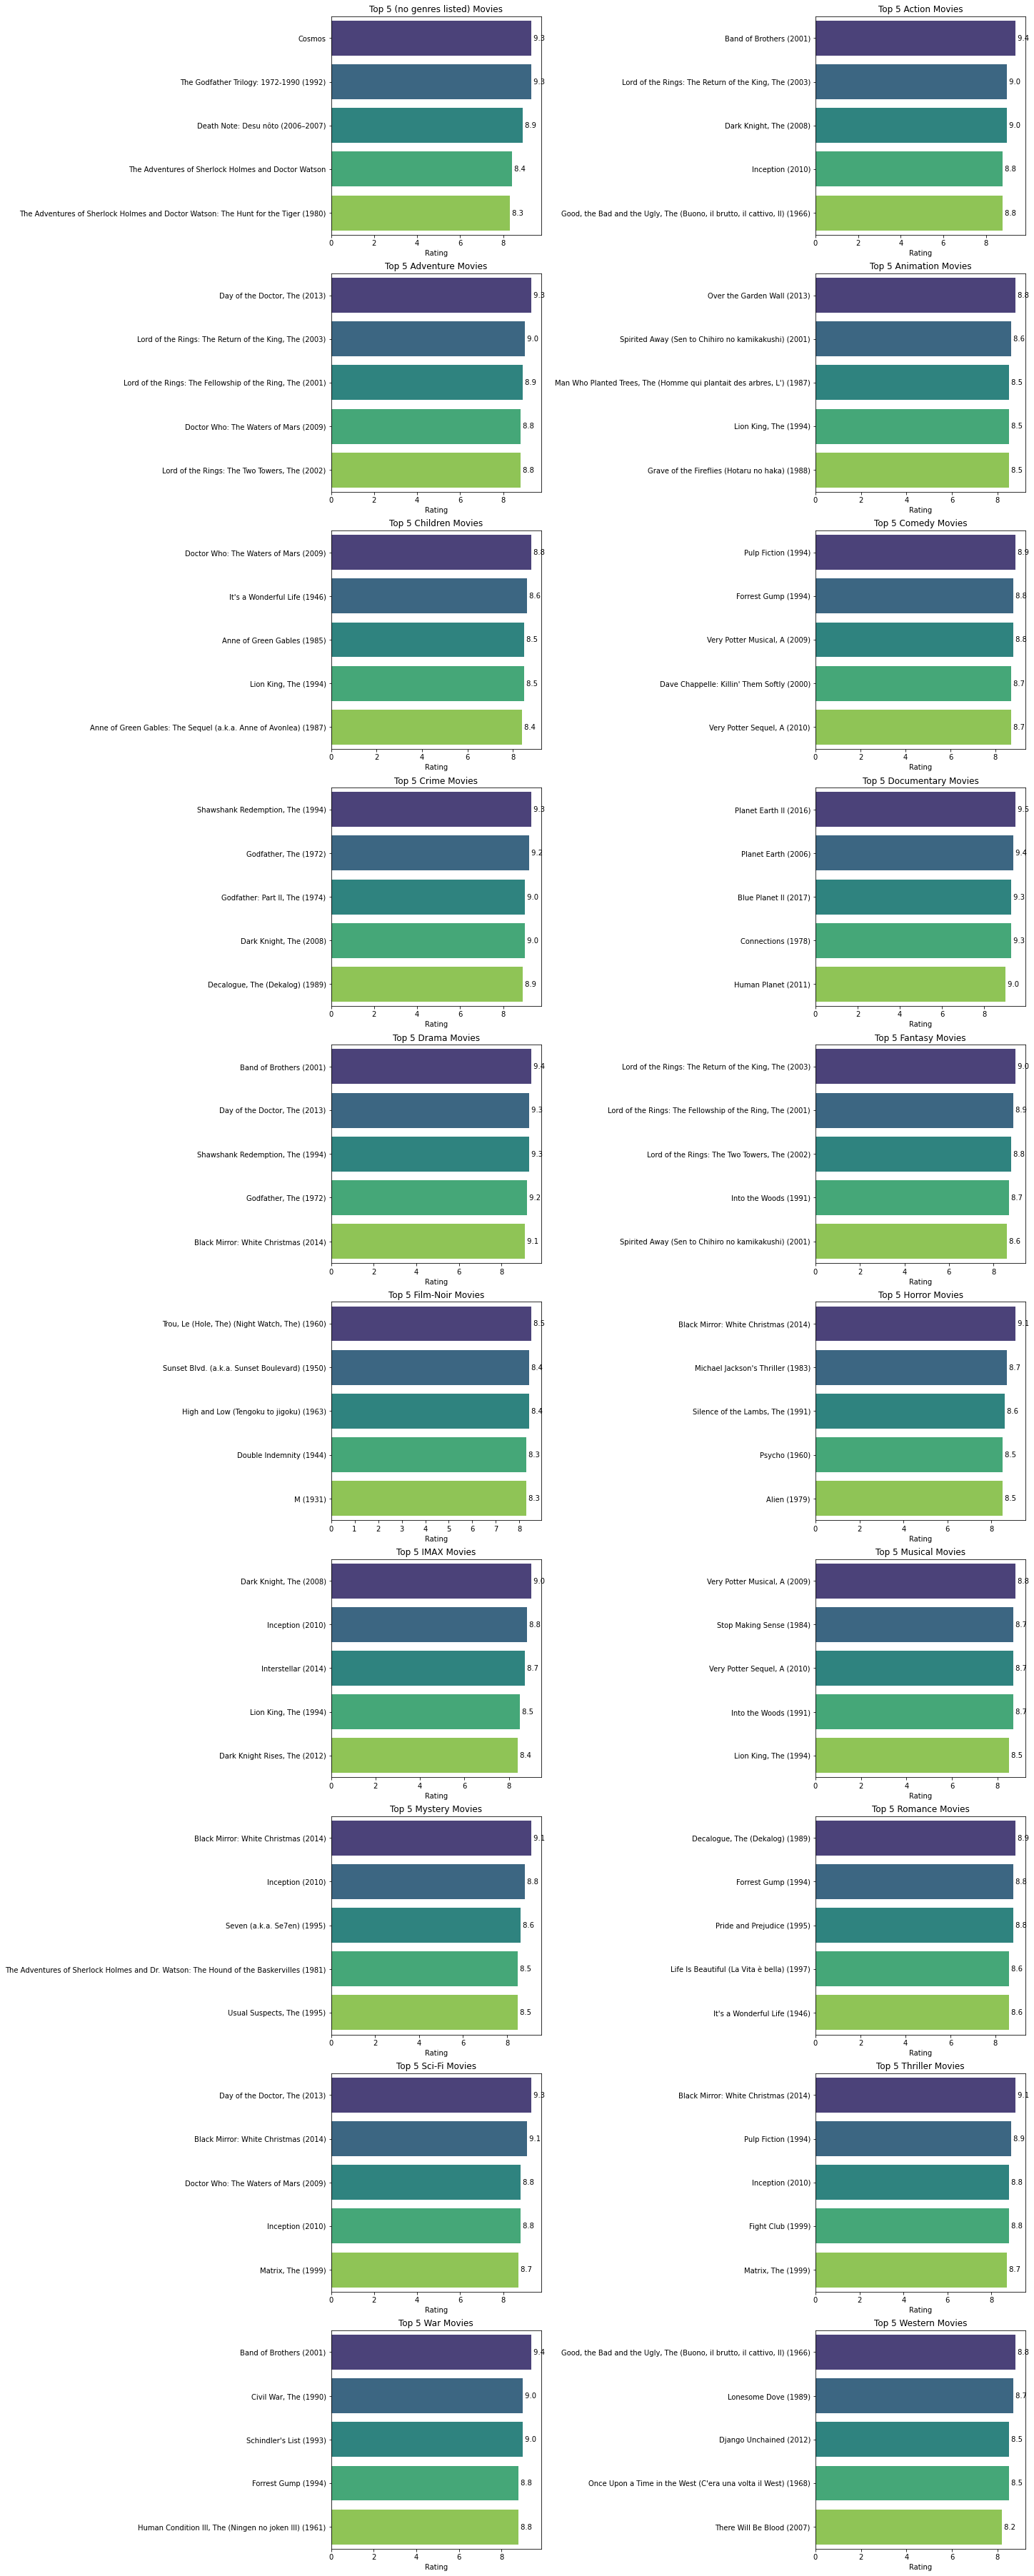

In [16]:
all_genres = top_movies_per_genre['genres'].unique()

# Create a subplot for each genre
n_genres = len(all_genres)
n_cols = 2
n_rows = n_genres // n_cols + (n_genres % n_cols > 0) 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows), constrained_layout=True)

if n_genres <= n_cols:
    axes = axes.flatten()

for i, genre in enumerate(all_genres):
    ax = axes.flatten()[i] if n_genres > n_cols else axes[i]
    
    genre_data = top_movies_per_genre[top_movies_per_genre['genres'] == genre]
    
    sns.barplot(x='rating', y='title', data=genre_data, ax=ax, palette="viridis")
    ax.set_title(f'Top 5 {genre} Movies')
    ax.set_xlabel('Rating')
    ax.set_ylabel('')
    
    for index, value in enumerate(genre_data['rating']):
        ax.text(value, index, f' {value}', color='black', va='center')
        
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()


### 1.4 Heatmap (Genres v.s Years) by movielens user rating

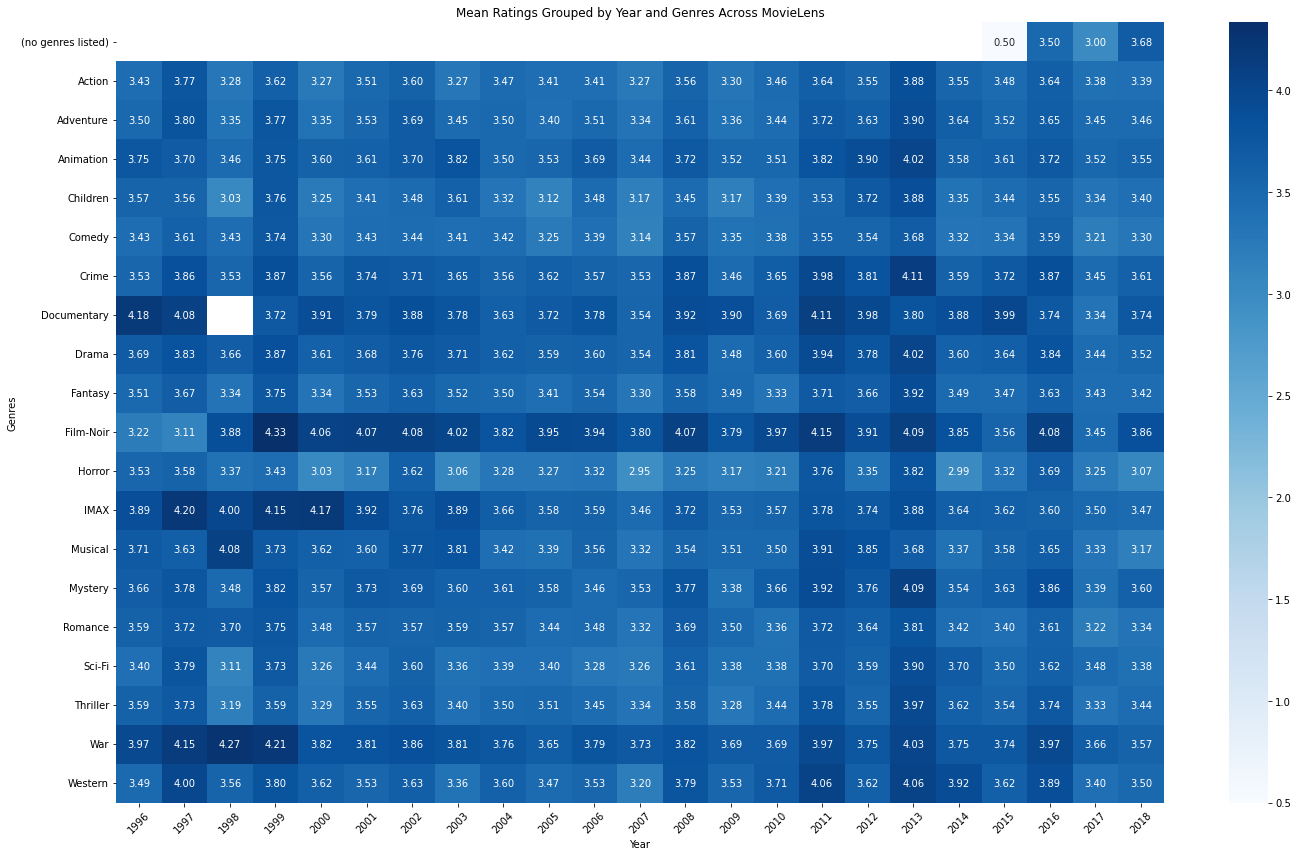

In [17]:
rating=pd.read_csv('ratings.csv')
rating['date'] = pd.to_datetime(rating['timestamp'], unit='s')
m = pd.read_csv('movies.csv')
genres=m[['genres','movieId']]
rating = rating.merge(genres, on='movieId')
rating['genres'] = rating['genres'].str.split('|')

# Convert the 'date' column to datetime format
rating['date'] = pd.to_datetime(rating['date'])

# Explode the 'genres' column to convert lists into individual rows
rating_exploded = rating.explode('genres')

# Extract year from 'date' column
rating_exploded['year'] = rating_exploded['date'].dt.year

# Group by year and genre, and calculate the mean rating
mean_ratings = rating_exploded.groupby(['year', 'genres'])['rating'].mean().reset_index()

# Pivot the table to have years as columns
ratings_pivot = mean_ratings.pivot(index='genres', columns='year', values='rating')

# Plot the mean ratings grouped by year and genre
plt.figure(figsize=(20, 12))
sns.heatmap(ratings_pivot, cmap='Blues', annot=True, fmt='.2f')
plt.title('Mean Ratings Grouped by Year and Genres Across MovieLens')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Directors

### 2.1 Average Rating of Movies for Each Director

In [18]:
# Convert directors from string representation of list to actual list
movies_df['directors'] = movies_df['directors'].apply(ast.literal_eval)

In [19]:
# Explode the directors column so each director gets their own row
movies_df_exploded = movies_df.explode('directors')

In [20]:
movies_df_exploded

,movieId,imdbId,title,year,certificate,length (min),stars,genres,directors,rating,rating_no (K)
0,1,114709,Toy Story (1995),1995,G,81,"['Tom Hanks ', ' Tim Allen ', ' Don Rickles']","[Adventure, Animation, Children, Comedy, Fantasy]",John Lasseter,8.3,1100.000
1,2,113497,Jumanji (1995),1995,PG,104,"['Robin Williams ', ' Kirsten Dunst ', ' Bonni...","[Adventure, Children, Fantasy]",Joe Johnston,7.1,372.000
2,3,113228,Grumpier Old Men (1995),1995,PG13,101,"['Walter Matthau ', ' Jack Lemmon ', ' Ann-Mar...","[Comedy, Romance]",Howard Deutch,6.6,30.000
3,4,114885,Waiting to Exhale (1995),1995,R,124,"['Whitney Houston ', ' Angela Bassett ', ' Lor...","[Comedy, Drama, Romance]",Forest Whitaker,6.0,12.000
4,5,113041,Father of the Bride Part II (1995),1995,PG,106,"['Steve Martin ', ' Diane Keaton ', ' Martin S...",[Comedy],Charles Shyer,6.1,41.000
...,...,...,...,...,...,...,...,...,...,...,...
9568,193581,5476944,Black Butler: Book of the Atlantic (2017),2017,R,101,"['Bryn Apprill ', ' Dawn M. Bennett ', ' Justi...","[Action, Animation, Comedy, Fantasy]",Noriyuki Abe,7.6,1.400
9569,193583,5914996,No Game No Life: Zero (2017),2017,TV-14,110,"['Alexandra Bedford ', ' Jessica Boone ', ' Ri...","[Animation, Comedy, Fantasy]",Atsuko Ishizuka,7.3,4.500
9570,193585,6397426,Flint (2017),2017,TV-14,86,"['Rob Morrow ', ' Marin Ireland ', ' Queen Lat...",[Drama],Bruce Beresford,6.2,0.431
9571,193587,8391976,Bungo Stray Dogs: Dead Apple (2018),2018,TV-14,92,"['Brian Beacock ', ' Ray Chase ', ' Lucien Dod...","[Action, Animation]",Takuya Igarashi,7.3,2.100


In [21]:
# delete the rows that director's value is null or empty string
df = movies_df_exploded[(movies_df_exploded['directors'].notna()) &
                   (movies_df_exploded['directors'].str.strip() != '')]
df

,movieId,imdbId,title,year,certificate,length (min),stars,genres,directors,rating,rating_no (K)
0,1,114709,Toy Story (1995),1995,G,81,"['Tom Hanks ', ' Tim Allen ', ' Don Rickles']","[Adventure, Animation, Children, Comedy, Fantasy]",John Lasseter,8.3,1100.000
1,2,113497,Jumanji (1995),1995,PG,104,"['Robin Williams ', ' Kirsten Dunst ', ' Bonni...","[Adventure, Children, Fantasy]",Joe Johnston,7.1,372.000
2,3,113228,Grumpier Old Men (1995),1995,PG13,101,"['Walter Matthau ', ' Jack Lemmon ', ' Ann-Mar...","[Comedy, Romance]",Howard Deutch,6.6,30.000
3,4,114885,Waiting to Exhale (1995),1995,R,124,"['Whitney Houston ', ' Angela Bassett ', ' Lor...","[Comedy, Drama, Romance]",Forest Whitaker,6.0,12.000
4,5,113041,Father of the Bride Part II (1995),1995,PG,106,"['Steve Martin ', ' Diane Keaton ', ' Martin S...",[Comedy],Charles Shyer,6.1,41.000
...,...,...,...,...,...,...,...,...,...,...,...
9568,193581,5476944,Black Butler: Book of the Atlantic (2017),2017,R,101,"['Bryn Apprill ', ' Dawn M. Bennett ', ' Justi...","[Action, Animation, Comedy, Fantasy]",Noriyuki Abe,7.6,1.400
9569,193583,5914996,No Game No Life: Zero (2017),2017,TV-14,110,"['Alexandra Bedford ', ' Jessica Boone ', ' Ri...","[Animation, Comedy, Fantasy]",Atsuko Ishizuka,7.3,4.500
9570,193585,6397426,Flint (2017),2017,TV-14,86,"['Rob Morrow ', ' Marin Ireland ', ' Queen Lat...",[Drama],Bruce Beresford,6.2,0.431
9571,193587,8391976,Bungo Stray Dogs: Dead Apple (2018),2018,TV-14,92,"['Brian Beacock ', ' Ray Chase ', ' Lucien Dod...","[Action, Animation]",Takuya Igarashi,7.3,2.100


In [22]:
# Group by directors and calculate average rating and movie count
director = df.groupby('directors').agg(
    average_rating=('rating', 'mean'),
    movies_count=('movieId', 'count')
)

In [23]:
df2 = director.reset_index()
# Round the average rating
df2['average_rating'] = df2['average_rating'].round(2)
# Drop Creators
df2 = df2.drop(df2[df2['directors'] == 'Creators '].index)

In [24]:
# Sort by average rating
directors1 = df2.sort_values(by='average_rating', ascending=False)
directors1

,directors,average_rating,movies_count
352,Gordon Buchanan,9.5,1
897,Sigourney Weaver,9.4,1
876,Scott Grimes,9.4,1
849,Ron Livingston,9.4,1
199,Damian Lewis,9.4,1
...,...,...,...
1683,Clark L. Paylow,1.8,1
2673,James Nguyen,1.7,1
1447,Brett Kelly,1.5,1
1762,Dale Resteghini,1.4,1


In [25]:
# Sort by movies count
directors2 = df2.sort_values(by='movies_count', ascending=False)
directors2

,directors,average_rating,movies_count
4588,Stars,7.93,78
5032,Woody Allen,7.02,46
1169,Alfred Hitchcock,7.33,37
4669,Steven Spielberg,7.40,32
1698,Clint Eastwood,7.04,31
...,...,...,...
2812,Jerry Kramer,6.10,1
2813,Jerry Lewis,6.60,1
2814,Jerry London,4.60,1
2815,Jerry Paris,5.40,1


### 2.2 Top 10 directors by average rating filtered by movies_count >= 2

In [26]:
# Top 10 directors by average rating filtered by movies_count >= 2
filter_df = directors1[directors1['movies_count']>=2]
top_10_directors = filter_df.head(10)
top_10_directors

,directors,average_rating,movies_count
220,David Attenborough,9.30,4
157,Chadden Hunter,9.25,2
5,Adam Curtis,8.55,2
5042,Yann Arthus-Bertrand,8.55,2
24,Alec Guinness,8.50,2
193,Colleen Dewhurst,8.45,2
671,Megan Follows,8.45,2
812,Rina Zelyonaya,8.43,3
3577,Masaki Kobayashi,8.43,6
2553,Igor Maslennikov,8.33,4


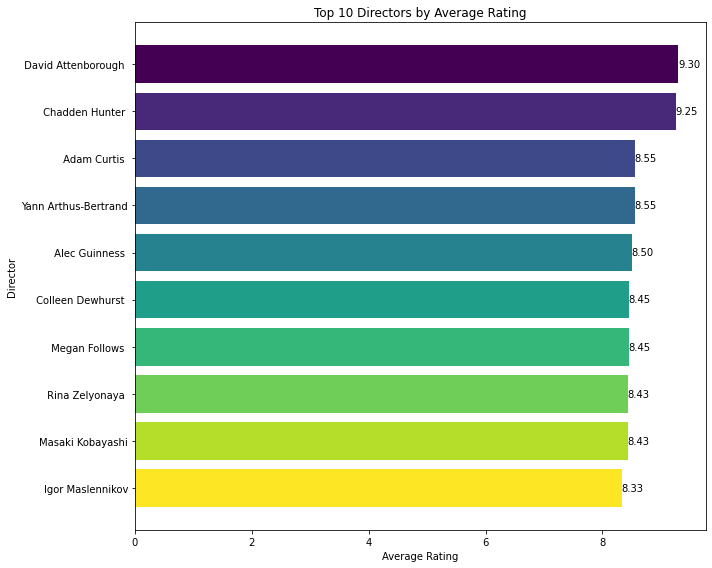

In [27]:
# Plot top 10 directors
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_directors)))
bars2 = plt.barh(top_10_directors['directors'], top_10_directors['average_rating'], color= colors)
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average Rating')

# Invert y-axis to have the director with the highest rating on top
plt.gca().invert_yaxis()  

# Add a number label right beside each bar
for bar in bars2:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", 
             va='center', ha='left')

plt.tight_layout()
plt.show()

### 2.3 Top 10 Potential Directors

In [28]:
# Top 10 Potential Directors by average rating filtered by movies_count = 1
filter_df1 = directors1[directors1['movies_count']==1]
top_10_p_directors = filter_df1.head(10)
top_10_p_directors

,directors,average_rating,movies_count
352,Gordon Buchanan,9.5,1
897,Sigourney Weaver,9.4,1
876,Scott Grimes,9.4,1
849,Ron Livingston,9.4,1
199,Damian Lewis,9.4,1
724,Nikolay Drozdov,9.4,1
842,Roger Munns,9.3,1
924,Steven Soter,9.3,1
134,Bruce Boa,9.3,1
757,Peter Drost,9.3,1


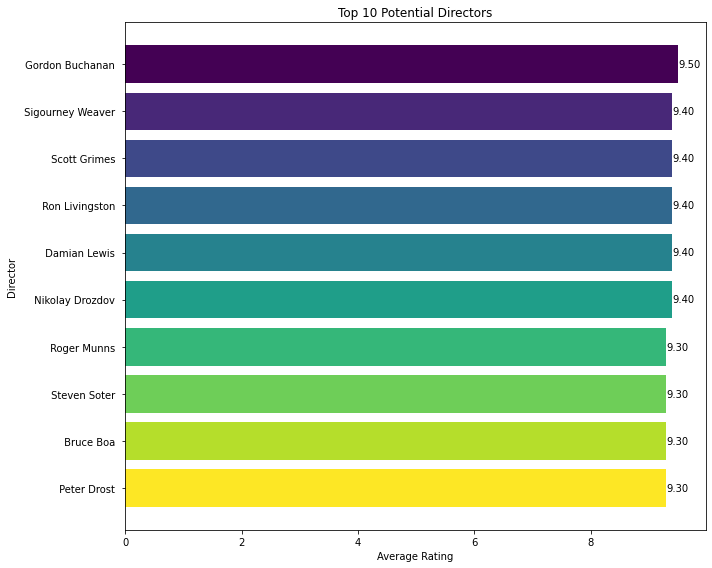

In [29]:
# Plot top 10 directors
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_p_directors)))
bars3 = plt.barh(top_10_p_directors['directors'], top_10_p_directors['average_rating'], color= colors)
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Potential Directors')

# Invert y-axis to have the director with the highest rating on top
plt.gca().invert_yaxis()  

# Add a number label right beside each bar
for bar in bars3:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", 
             va='center', ha='left')

plt.tight_layout()
plt.show()

## 3. Reviews

### 3.1 Word Cloud

#### Reference: Word Cloud.ipynb

## 4. Other preparation for EDA

### 4.1 rating comparation (imdb v.s movielens)

In [30]:
ratings = pd.read_csv('ratings.csv')

In [31]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [32]:
# Group by movieId and calculate average rating
df3 = ratings.groupby('movieId')['rating'].mean()

In [33]:
movie_rating = df3.reset_index()
movie_rating.columns = ['movieID','rating_movielens']
movie_rating

,movieID,rating_movielens
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [34]:
movie_rating.shape

(9724, 2)

In [35]:
# Compare the ratings (imdb and movielens)
df4 = movies_df.merge(movie_rating, left_on='movieId', right_on='movieID', how='left')
rating_compare = df4[['movieId','rating', 'rating_movielens']]

In [36]:
rating_compare

,movieId,rating,rating_movielens
0,1,8.3,3.920930
1,2,7.1,3.431818
2,3,6.6,3.259615
3,4,6.0,2.357143
4,5,6.1,3.071429
...,...,...,...
9568,193581,7.6,4.000000
9569,193583,7.3,3.500000
9570,193585,6.2,3.500000
9571,193587,7.3,3.500000


In [37]:
rating_compare.rename(columns={'rating': 'rating_imdb'}, inplace=True)
rating_compare['rating_movielens'] = rating_compare['rating_movielens']*2
rating_compare['rating_movielens']  = rating_compare['rating_movielens'].round(1)

<ipython-input-37-eed4e77aa0e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_compare.rename(columns={'rating': 'rating_imdb'}, inplace=True)
<ipython-input-37-eed4e77aa0e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_compare['rating_movielens'] = rating_compare['rating_movielens']*2
<ipython-input-37-eed4e77aa0e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [38]:
rating_compare

,movieId,rating_imdb,rating_movielens
0,1,8.3,7.8
1,2,7.1,6.9
2,3,6.6,6.5
3,4,6.0,4.7
4,5,6.1,6.1
...,...,...,...
9568,193581,7.6,8.0
9569,193583,7.3,7.0
9570,193585,6.2,7.0
9571,193587,7.3,7.0


## 5. Certificate

In [39]:
certificate_list = movies_df['certificate']

# Count the occurrence of each unique genre
certificate_count = Counter(certificate_list)

certificate_count_sorted = dict(sorted(certificate_count.items(), key=lambda item: item[1], reverse=True))

certificate_count_sorted

{'R': 3541,
 'PG13': 1788,
 'PG': 1656,
 'unrated': 1374,
 'Passed': 456,
 'G': 317,
 '16+': 128,
 '6+': 81,
 'TV-14': 77,
 '12+': 52,
 '0+': 31,
 'R21': 21,
 'PG-12': 17,
 '15+': 13,
 '13+': 12,
 '(Banned)': 6,
 '7+': 1,
 'U': 1,
 'E': 1}

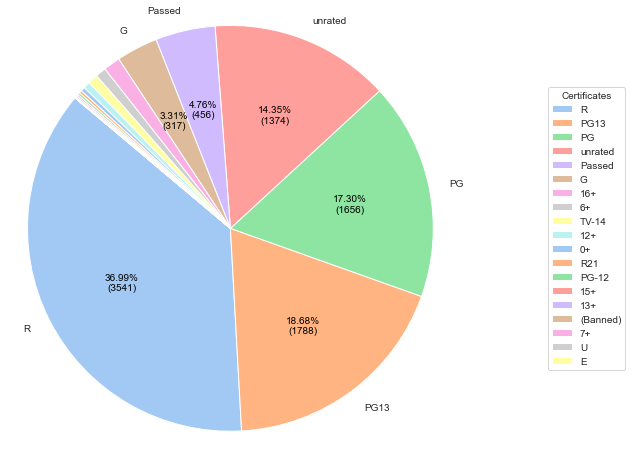

In [58]:
# Count each certificate
certificate_counts = movies_df['certificate'].value_counts()
# Use a seaborn color palette
colors = sns.color_palette('pastel', len(certificate_counts))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val) if pct > 3 else ''
    return my_format

# Prepare labels with certificate name for slices greater than 1%
labels = [f'{label}' if value / sum(certificate_counts) * 100 > 3 else '' for label, value in certificate_counts.items()]

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(certificate_counts, labels=labels, autopct=autopct_format(certificate_counts), startangle=140, colors=colors)

# plt.title('Distribution of Certificates in Movies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize autotexts (percentages)
for autotext in autotexts:
    autotext.set_color('black')  # Change color to white for better readability

# Create a legend
plt.legend(wedges, certificate_counts.index, title="Certificates", loc="center left", bbox_to_anchor=(1.2, 0.5))

# Show the pie chart
plt.show()

# 6. Stars

In [42]:
# Define high rated movie
high_rated_movies = movies_df[movies_df['rating'] > 7.5]

In [43]:
# Find top 10 stars
stars_series = high_rated_movies['stars'].str.split(', ', expand=True).stack()
star_frequencies = stars_series.value_counts()
top_10_stars = star_frequencies.head(10)
top_10_stars_df = top_10_stars.reset_index()
top_10_stars_df.columns = ['Star', 'Frequency']
top_10_stars_df

,Star,Frequency
0,['Tom Hanks ',13
1,['Robert De Niro ',10
2,['Toshirô Mifune ',10
3,['Humphrey Bogart ',10
4,['Vasiliy Livanov ',10
5,['Clint Eastwood ',10
6,['Al Pacino ',10
7,['James Stewart ',9
8,' Vitali Solomin ',8
9,['Charles Chaplin ',8


In [44]:
# Clean up 'Star' column
top_10_stars_df['Star'] = top_10_stars_df['Star'].str.strip("[] '")
top_10_stars_df.index = range(1, len(top_10_stars_df) + 1)
top_10_stars_df

,Star,Frequency
1,Tom Hanks,13
2,Robert De Niro,10
3,Toshirô Mifune,10
4,Humphrey Bogart,10
5,Vasiliy Livanov,10
6,Clint Eastwood,10
7,Al Pacino,10
8,James Stewart,9
9,Vitali Solomin,8
10,Charles Chaplin,8


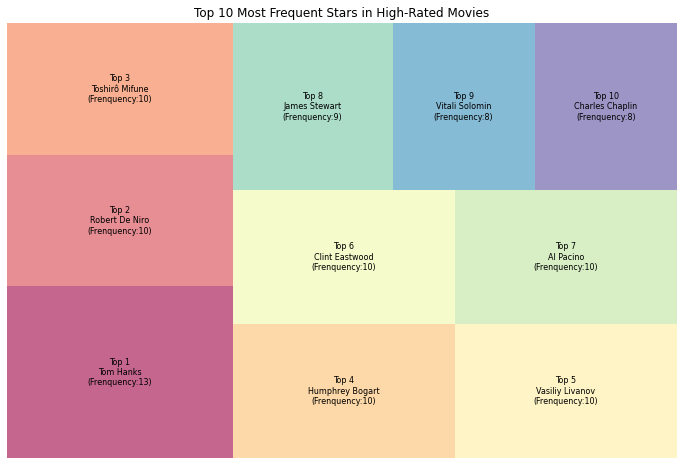

In [45]:
# Plotting
plt.figure(figsize=(12, 8))
labels = [f"Top {i}\n{row.Star}\n(Frenquency:{row.Frequency})" for i, row in enumerate(top_10_stars_df.itertuples(),1)]
colors = plt.cm.Spectral(np.linspace(0, 1, len(top_10_stars_df)))
squarify.plot(sizes=top_10_stars_df['Frequency'], label=labels, color=colors, alpha=0.6, text_kwargs={'fontsize':8})

plt.title('Top 10 Most Frequent Stars in High-Rated Movies')
plt.axis('off')
plt.show()

## 7. Ratings

### 7.1 Distribution of Movie Rating

In [46]:
# pip install -U seaborn

In [47]:
import seaborn as sns

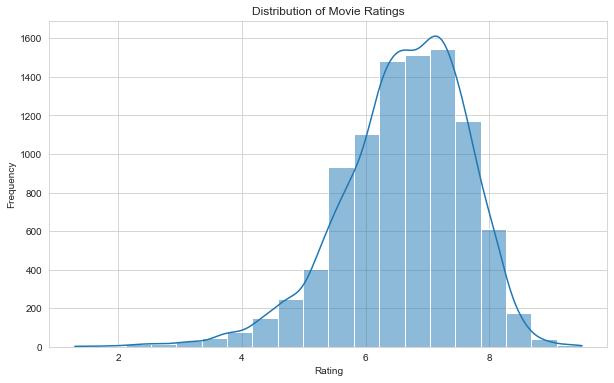

In [49]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 7.2 Relationship between Movie's Length and Average Rating

NameError: name 'correlation' is not defined

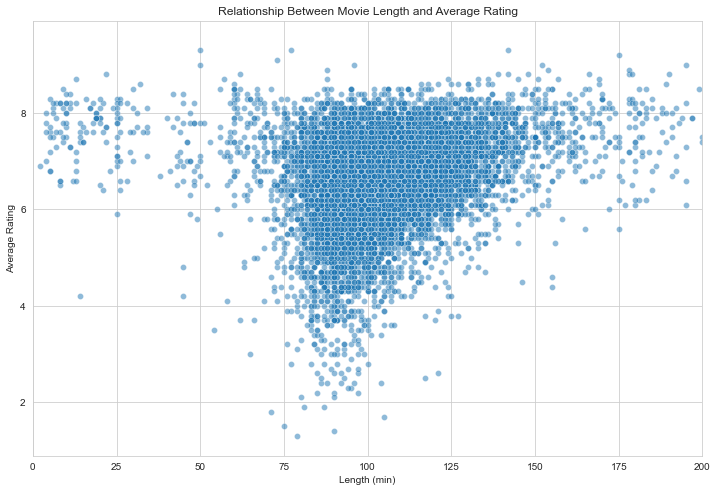

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=movies_df, x='length (min)', y='rating', alpha=0.5)
plt.title('Relationship Between Movie Length and Average Rating')
plt.xlabel('Length (min)')
plt.ylabel('Average Rating')
plt.xlim(0, 200)  #focus on movie lengths from 0 to 200 minutes
plt.figtext(0.5, 0.01, f'Pearson Correlation Coefficient: {correlation:.2f}', ha='center', fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show()


## 8. Heatmap (correlation among numerical values)

1989.5


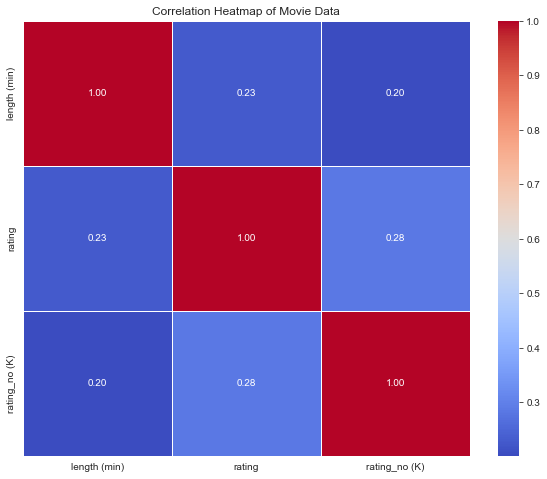

In [61]:
def convert_range_to_float(value):
    # Check if the value is a range (contains '–')
    if '–' in value:
        start_year, end_year = value.split('–')
        # Convert the start and end years to float and average them
        return (float(start_year) + float(end_year)) / 2
    else:
        # If not a range, simply convert the value to float
        return float(value)

# Example usage
value = '1989–1990'
converted_value = convert_range_to_float(value)
print(converted_value)

# Compute the correlation matrix
correlation_matrix = movies_df[["length (min)", "rating", "rating_no (K)"]].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Movie Data')
plt.show()